In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

# do something to prove it works
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)

[405, 324, 569, 981, 464]

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

print('Modules are imported.')

Modules are imported.


In [3]:
# Initialize Spark session
spark = SparkSession.builder.appName("Covid19Analysis").getOrCreate()

covid_data = spark.read.csv('covid-19.csv.csv', header=True, inferSchema=True)

# Perform necessary data transformations
covid_data = covid_data.withColumn("date", F.to_date("date", "yyyy-MM-dd"))

In [4]:
# Filter data for selected countries
countries = ['china', 'italy', 'us', 'spain']
selected_countries_data = covid_data.filter(covid_data['country'].isin(countries))

# Calculate Case Fatality Rate (CFR)
selected_countries_data = selected_countries_data.withColumn("CFR", (F.col("deaths") / F.col("confirmed")) * 100)

# Convert PySpark DataFrame to Pandas DataFrame for visualization
pandas_df = selected_countries_data.toPandas()


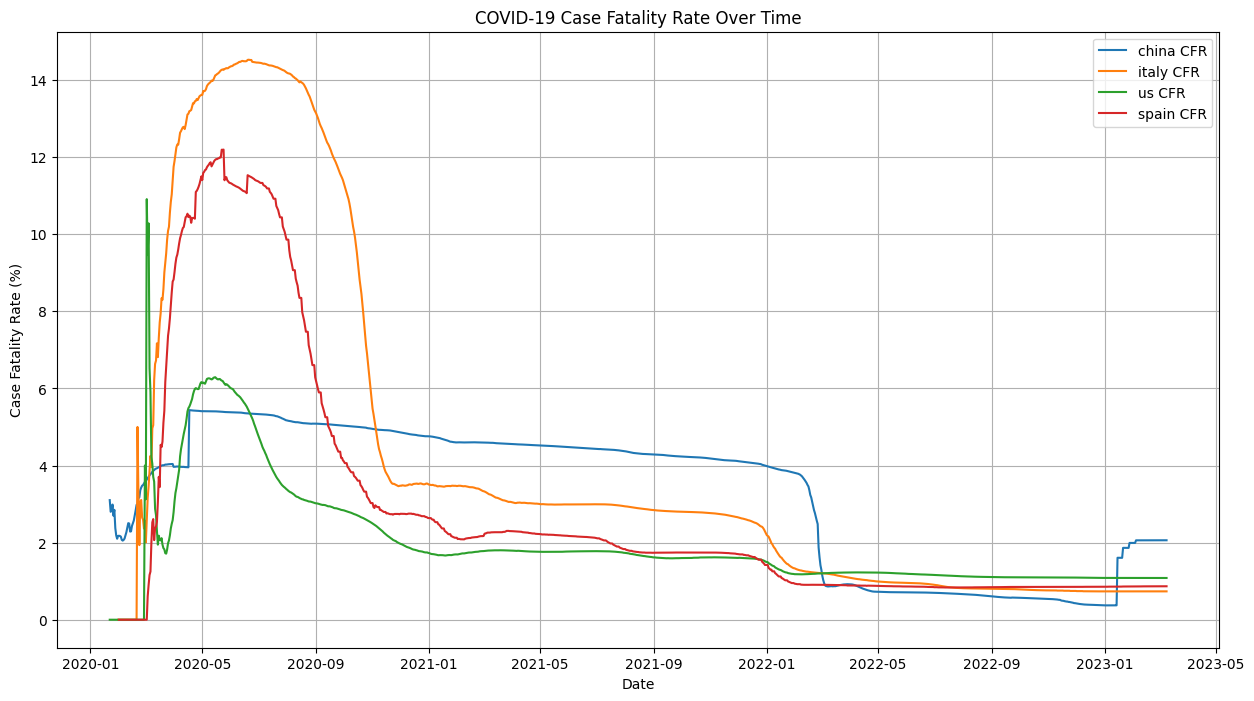

In [5]:
# Visualize CFR over time
plt.figure(figsize=(15, 8))
for country in countries:
    country_data = pandas_df[pandas_df['country'] == country]
    plt.plot(country_data['date'], country_data['CFR'], label=f'{country} CFR')

plt.title('COVID-19 Case Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Stop the Spark session
spark.stop()